#**Market Segmentation Analysis on EV Market in India**
---

**Importing Libraries**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# **Data Analysis**

In [20]:
data = pd.read_csv('Indian automoble buying behavour study 1.0.csv', encoding= 'unicode_escape')

In [21]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [22]:
data.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [23]:
data.nunique()

Age                 22
Profession           2
Marrital Status      2
Education            2
No of Dependents     4
Personal loan        2
House Loan           2
Wife Working         3
Salary              24
Wife Salary         14
Total Salary        36
Make                 9
Price               10
dtype: int64

In [36]:
data.shape

(99, 13)

In [38]:
data.isnull()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,False,False,False,False,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False


# **Data Cleaning and Visualization**

In [24]:

data['Marrital Status'] = data['Marrital Status'].replace(['Single','Married'],['0','1'])
data['Education'] = data['Education'].replace(['Post Graduate','Graduate'],['2','1'])
data['Profession'] = data['Profession'].replace(['Business','Salaried'],['2','1'])
data['Wife Working'] = data['Wife Working'].replace(['m'],['Yes'])

from sklearn.preprocessing import LabelEncoder
def yn(x):
    data[x] = LabelEncoder().fit_transform(data[x])
    return data

change = ['Personal loan','House Loan','Wife Working']

for i in change:
    yn(i)
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,0,2,0,1,0,0,800000,0,800000,i20,800000
1,35,1,1,2,2,1,1,1,1400000,600000,2000000,Ciaz,1000000
2,45,2,1,1,4,1,1,0,1800000,0,1800000,Duster,1200000
3,41,2,1,2,3,0,0,1,1600000,600000,2200000,City,1200000
4,31,1,1,2,2,1,0,1,1800000,800000,2600000,SUV,1600000


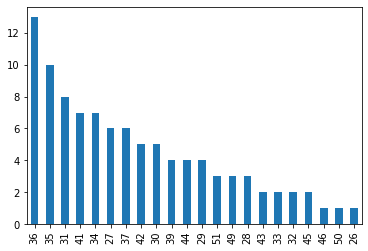

In [25]:
data["Age"].value_counts().plot(kind="bar")

From the above graph we can see that the highest ages and lowest ages count are lower than every other age group. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c496cc190>,
      dtype=object)

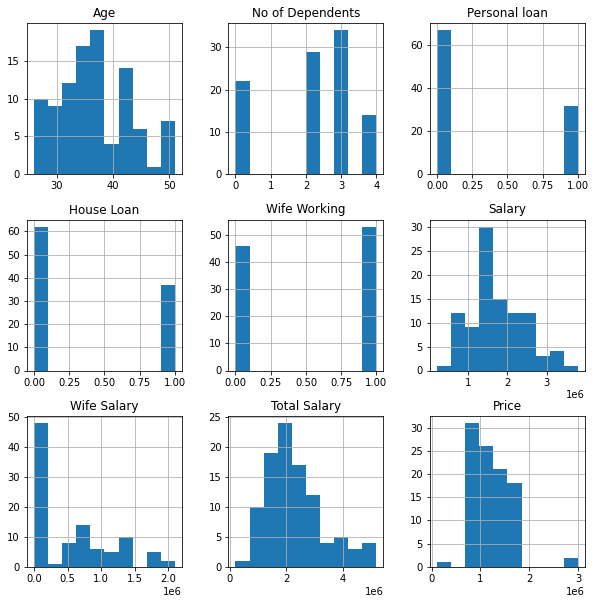

In [26]:
data.hist(figsize=(10,10))

From this we see that age group between 30-40 years tend to buy more vehicles.

In [27]:
#getting rid of the outliers
q_hi=data["Price"].quantile(0.99)
data_filtered = data[(data["Price"] < q_hi) ]

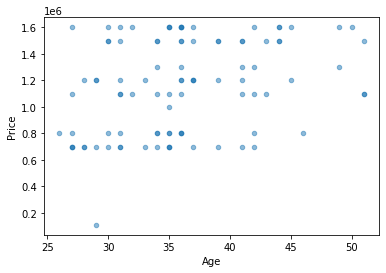

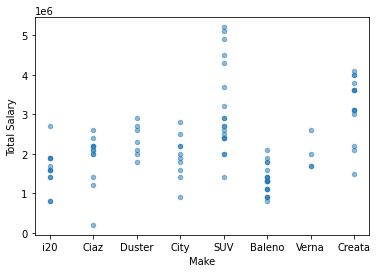

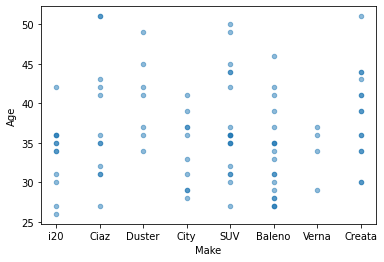

In [28]:
data_filtered.plot.scatter(x="Age", y="Price", alpha=0.5)
data_filtered.plot.scatter(x="Make", y="Total Salary", alpha=0.5)
data_filtered.plot.scatter(x="Make", y="Age", alpha=0.5)

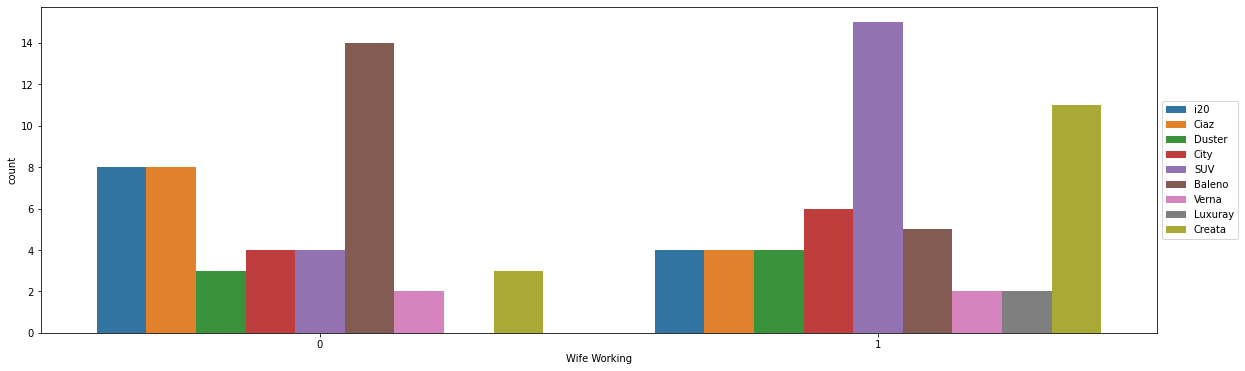

In [29]:
plt.figure(figsize=(20,6))
sns.countplot(x="Wife Working", data=data, hue="Make")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

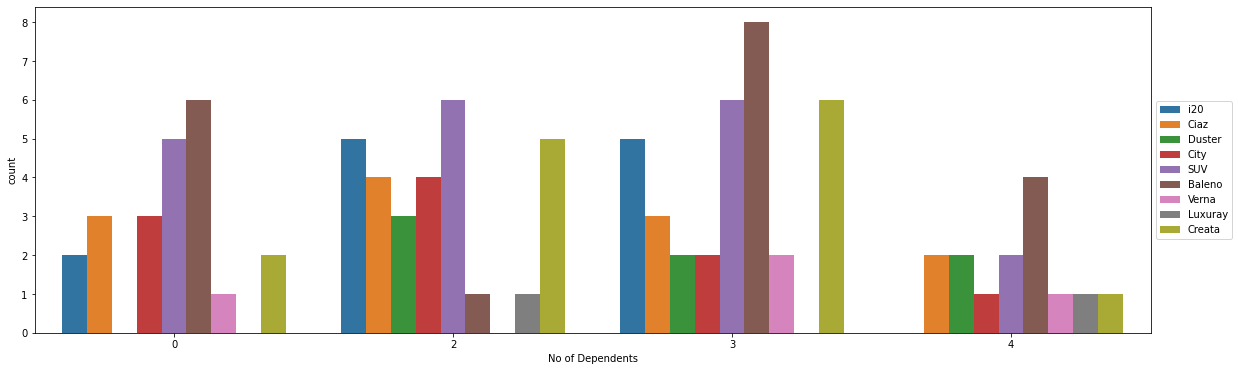

In [30]:
plt.figure(figsize=(20,6))
sns.countplot(x="No of Dependents", data=data, hue="Make")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# **Segmentation**

In [31]:
newdata=data.drop(['Education','Profession','Marrital Status','Make'],axis=1)
x = newdata.values

In [32]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
pca_data = preprocessing.scale(x)

pca = PCA(n_components=9)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9']
pf = pd.DataFrame(data = pc, columns = names)
pf
#,'pc10','pc11','pc12

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-1.854163e+06,-202432.821354,40567.118960,3.635048,-1.118961,-0.470728,0.565816,-0.309839,1.492325e-10
1,-3.826262e+05,-250249.602303,-139131.609304,-0.548076,0.008554,-0.917518,0.015133,0.277333,6.896170e-12
2,-5.359339e+05,425905.557090,206282.575815,-8.947234,0.720370,-0.789283,0.021555,-0.137178,-3.915171e-10
3,-8.915747e+04,-141101.285512,9066.732487,-5.515804,0.046029,0.458091,0.051524,0.415810,-4.210246e-12
4,4.841961e+05,-202927.320613,268765.074242,5.712712,0.780629,-0.409692,0.743082,0.271559,1.292797e-09
...,...,...,...,...,...,...,...,...,...
94,2.947676e+05,780882.772175,459118.850510,12.859415,-0.549291,0.253859,-0.085425,0.090421,3.167523e-10
95,3.497287e+06,805273.278104,-367485.891701,-0.810932,-0.724187,0.868274,0.276916,0.379697,3.730845e-10
96,-7.325812e+04,713032.852758,23282.382649,-12.154812,-2.064471,-0.988302,-0.019447,0.021683,1.213053e-10
97,2.131732e+06,67296.211659,-223783.018065,-8.205408,-2.081683,0.377002,0.171338,0.176784,8.190206e-11


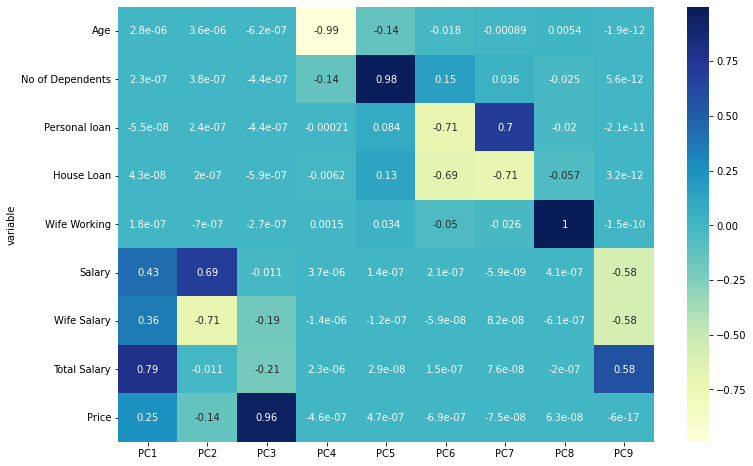

In [33]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = newdata.columns.values
loadings_df = loadings_df.set_index('variable')
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
sns.heatmap(loadings_df, annot = True, cmap = 'YlGnBu')
plt.show()

In [34]:
import plotly.express as px
features = ['Age', 'No of Dependents', 'Personal loan', 'House Loan',
       'Wife Working', 'Salary', 'Wife Salary', 'Total Salary','Price']
X = data[features]
#'Education','Profession','Marrital Status',
pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=data['Wife Working'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()